In [6]:
from sklearn import datasets
import numpy as np

In [2]:
dataset=datasets.load_breast_cancer()

In [4]:
feature=dataset.data
targets=dataset.target

In [7]:
feature.shape,np.unique(targets)

((569, 30), array([0, 1]))

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(feature,targets,test_size=0.2,random_state=2)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [39]:
knn.score(x_test,y_test)

0.9912280701754386

In [30]:
# finding best value of k 
lst=[]
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    lst.append(knn.score(x_test,y_test))

In [31]:
import matplotlib.pyplot as plt

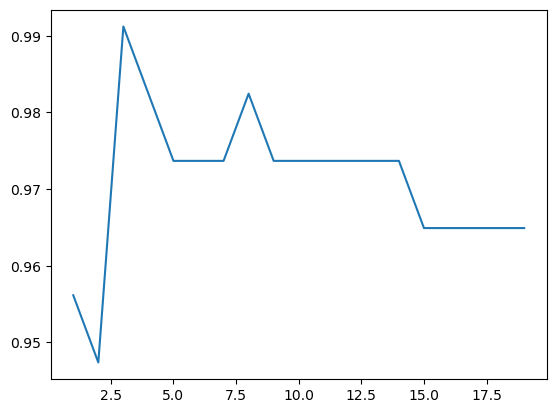

In [34]:
plt.plot(range(1,20),lst)

In [40]:
# so from graph best accuracy in k= 3